In [1]:
import pyro
import torch
import pyro.distributions as dist

import pyro.infer as infer

In [117]:
true_coefs = torch.tensor([4, 7])

In [118]:
data = torch.rand(2000, 2)
eps = 0.002
dim = 2
labels = dist.Normal((true_coefs * data).sum(-1), torch.ones(len(data))*eps).sample()

In [146]:
def model(data):
    coefs_mean = torch.zeros(dim)
    coefs = pyro.sample('beta', dist.Normal(coefs_mean, torch.ones(dim)))
    y = pyro.sample('y', dist.Normal((coefs * data).sum(-1), torch.ones(len(data))*eps), obs=labels)
    return y

In [147]:
nuts_kernel = infer.NUTS(model, adapt_step_size=True)
mcmc = infer.MCMC(nuts_kernel, num_samples=700, warmup_steps=300)

In [148]:
mcmc.run(data)
mcmc.get_samples()['beta'].mean(0)


Sample: 100%|██████████| 1000/1000 [00:06, 157.60it/s, step size=9.05e-03, acc. prob=0.913]


tensor([4.0000, 7.0000])

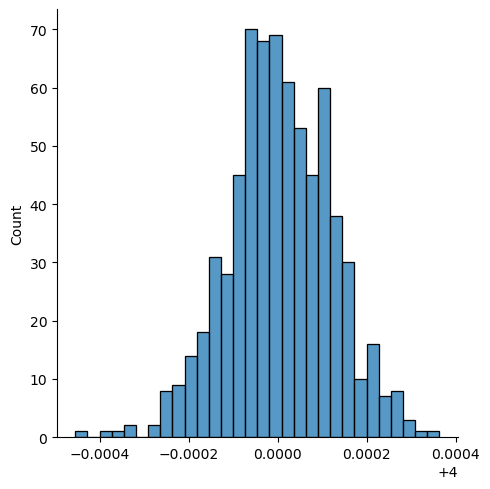

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(mcmc.get_samples()['beta'].numpy()[:, 0], bins=30)
plt.show()

In [151]:
pred_coefs = mcmc.get_samples()['beta'].mean(0)
y_hat = dist.Normal((pred_coefs * data).sum(-1), torch.ones(len(data))*eps).sample()